<a href="https://colab.research.google.com/github/kushagrasharma-13/Micro_Experiences/blob/main/Incorrect_Package_Dimensions_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report Link: [Google Docs](https://docs.google.com/document/d/1yKamoLqlft2EB61rBmQ9ikOWt4cVWlqwDOaU4ipyKeI/edit?usp=sharing)

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
from statistics import mode
import matplotlib.pyplot as plt

In [ ]:
consignment_data = pd.read_csv("/content/drive/MyDrive/Incorrect Package Dimensions Detection Model/P2_consignment_data.csv")
consignment_data.head(10)

,id,created_date,cnote,client_id,weight,Voloume,total_boxes,industry_type,QC_Validation,delivered,Delivery_Date,cpm
0,32123,15-01-2019 00:00,8000522895,1112,13.0,3.23,1,APPAREL,Yes,1,19-01-2019 17:01,1
1,32124,15-01-2019 00:00,8000119761,1113,122.0,23.30,14,3PL,Yes,1,17-01-2019 11:18,1
2,32125,15-01-2019 00:01,8000522921,1112,19.0,3.23,1,APPAREL,Yes,1,18-01-2019 10:38,1
3,32126,15-01-2019 00:01,8000574330,1114,68.0,11.16,4,3PL,Yes,1,18-01-2019 17:42,0
4,32127,15-01-2019 00:02,1002478259,1115,1075.0,73.35,50,CHEMICALS,Yes,1,22-01-2019 17:29,1
5,32128,15-01-2019 00:02,8000522929,1112,50.0,6.46,2,APPAREL,Yes,1,16-01-2019 12:58,1
6,32129,15-01-2019 00:02,1002229812,1116,354.0,42.50,34,MEDIA & PUBLICATIONS,Yes,1,24-01-2019 21:17,1
7,32130,15-01-2019 00:03,1002264337,1117,380.0,285.97,95,APPAREL,Yes,1,18-01-2019 17:01,1
8,32131,15-01-2019 00:03,8000522922,1112,19.0,3.23,1,APPAREL,Yes,1,19-01-2019 14:25,1
9,32132,15-01-2019 00:04,1002357239,1118,50.0,21.44,10,INDUSTRIAL,Yes,1,18-01-2019 17:50,1


In [ ]:
consignment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86663 entries, 0 to 86662
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             86663 non-null  int64  
 1   created_date   86663 non-null  object 
 2   cnote          86663 non-null  object 
 3   client_id      86663 non-null  int64  
 4   weight         86663 non-null  float64
 5   Voloume        86663 non-null  float64
 6   total_boxes    86663 non-null  int64  
 7   industry_type  86663 non-null  object 
 8   QC_Validation  86663 non-null  object 
 9   delivered      86663 non-null  int64  
 10  Delivery_Date  62536 non-null  object 
 11  cpm            86663 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 7.9+ MB


# **D1: IQR Analysis**
---

In [ ]:
#renaming the columns to correct values
consignment_data.rename(columns= {'Voloume': 'volume', 'id': 'consignment_id'}, inplace=True)
consignment_data.head()

,consignment_id,created_date,cnote,client_id,weight,volume,total_boxes,industry_type,QC_Validation,delivered,Delivery_Date,cpm
0,32123,15-01-2019 00:00,8000522895,1112,13.0,3.23,1,APPAREL,Yes,1,19-01-2019 17:01,1
1,32124,15-01-2019 00:00,8000119761,1113,122.0,23.30,14,3PL,Yes,1,17-01-2019 11:18,1
2,32125,15-01-2019 00:01,8000522921,1112,19.0,3.23,1,APPAREL,Yes,1,18-01-2019 10:38,1
3,32126,15-01-2019 00:01,8000574330,1114,68.0,11.16,4,3PL,Yes,1,18-01-2019 17:42,0
4,32127,15-01-2019 00:02,1002478259,1115,1075.0,73.35,50,CHEMICALS,Yes,1,22-01-2019 17:29,1


In [ ]:
#counting total number of null values in each column
consignment_data.isna().sum()

consignment_id        0
created_date          0
cnote                 0
client_id             0
weight                0
volume                0
total_boxes           0
industry_type         0
QC_Validation         0
delivered             0
Delivery_Date     24127
cpm                   0
dtype: int64

In [ ]:
#droping unnecassary columns
consignment_data.drop(columns=['created_date', 'cnote', 'QC_Validation', 'delivered', 'Delivery_Date', 'cpm'], inplace=True)
consignment_data.head()

,consignment_id,client_id,weight,volume,total_boxes,industry_type
0,32123,1112,13.0,3.23,1,APPAREL
1,32124,1113,122.0,23.30,14,3PL
2,32125,1112,19.0,3.23,1,APPAREL
3,32126,1114,68.0,11.16,4,3PL
4,32127,1115,1075.0,73.35,50,CHEMICALS


In [ ]:
print("Total unique count of industry types: ", consignment_data['industry_type'].nunique())

Total unique count of industry types:  12


In [ ]:
print("Total unique count of clients: ", consignment_data['client_id'].nunique())

Total unique count of clients:  1296


In [ ]:
#counting number of client for each industry
q = consignment_data['industry_type'].unique()
s = dict()
lk = list(consignment_data['industry_type'])
for i in q:
    kl = pd.Series([consignment_data['client_id'][x] for x in consignment_data.index if consignment_data['industry_type'][x]==i])
    s.update({i: kl.nunique()})
rank = sorted(s.items(), key=lambda x:x[1], reverse=True)
rank

[('INDUSTRIAL', 440),
 ('NON-ECOMMERCE', 250),
 ('APPAREL', 124),
 ('PHARMA', 111),
 ('ELECTRONICS', 111),
 ('MEDIA & PUBLICATIONS', 45),
 ('FMCG', 45),
 ('3PL', 43),
 ('RETAIL', 42),
 ('ECOMMERCE', 34),
 ('AUTOMOTIVE', 31),
 ('CHEMICALS', 20)]

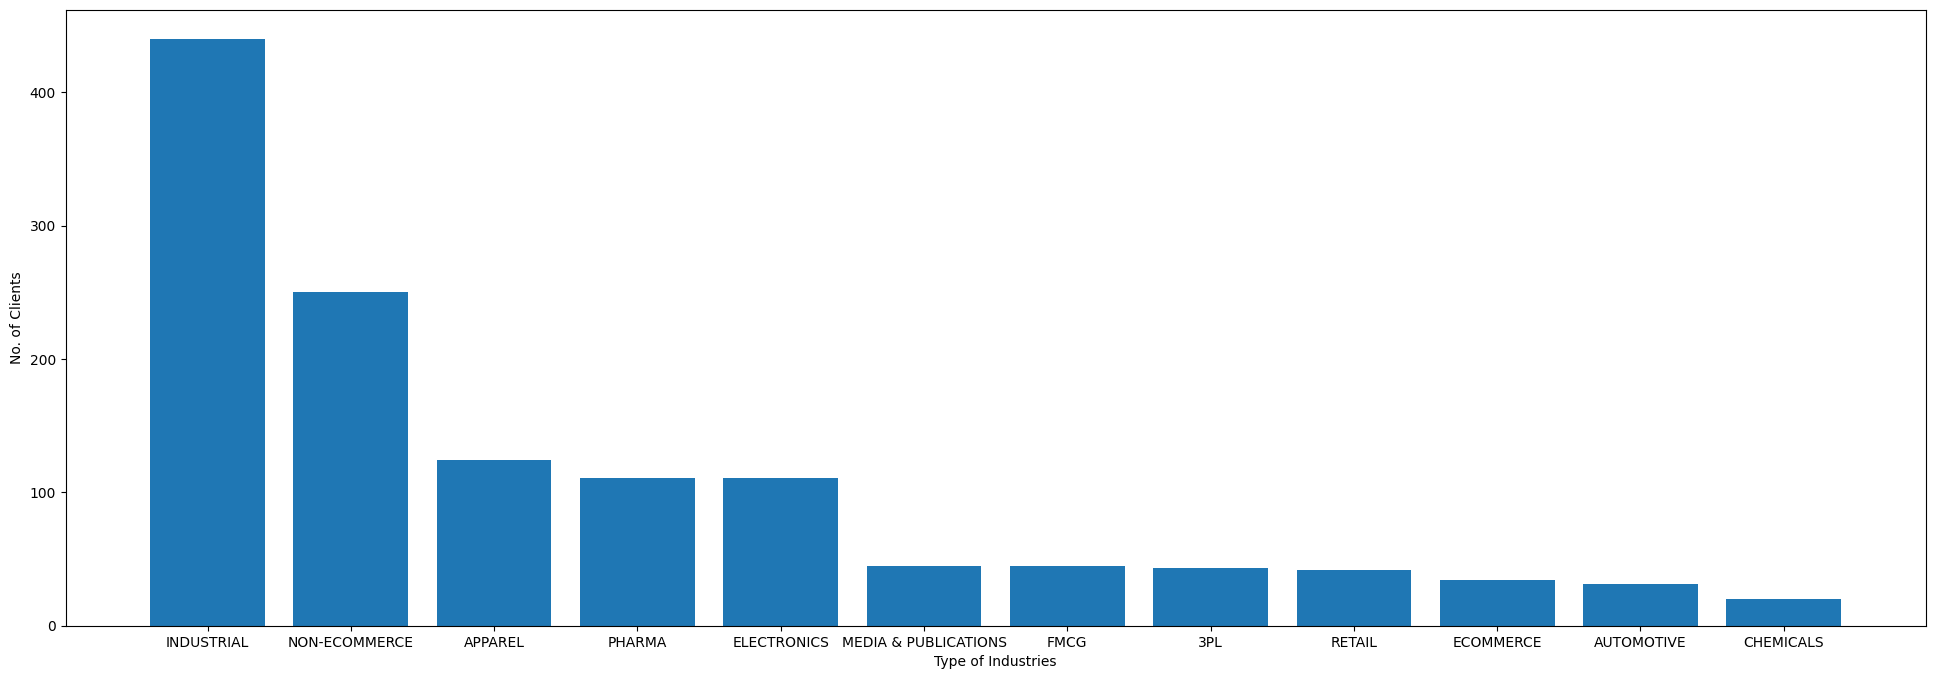

In [ ]:
#plotting number of client for each industry
industries = [x[0] for x in rank]
nulls = [x[1] for x in rank]
plt.figure(figsize=(24,8))
plt.bar(industries, nulls)
plt.xlabel('Type of Industries')
plt.ylabel('No. of Clients')
plt.show()

In [ ]:
#calculatin 'CFT' (density) for each consignment
consignment_data['CFT'] = 0
for i in consignment_data.index:
    w = consignment_data['weight'][i]
    v = consignment_data['volume'][i]
    consignment_data['CFT'][i] = w/v if v!=0 else None

<ipython-input-11-0b512adb8520>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consignment_data['CFT'][i] = w/v if v!=0 else None


# Analysis of consignment_data:


---



1. There are a total of 86663 entries with 11 features(or columns)
2. The column of 'Volume' was named incorrectly
3. Delivery_Date is the only column wiht missing(null) values
4. There are a total to 12 unique industries and 1296 unique clients
5. Industries with maximum number of client were as follows: [INDUSTRIAL > NON-ECOMMERCE > APPAREL > PHARMA > ELECTRONICS > MEDIA & PUBLICATIONS > FMCG > 3PL > RETAIL > ECOMMERCE > AUTOMOTIVE > CHEMICALS]
6. There are some entries that contains 0 as volume which is impossible value


In [ ]:
#doing iqr analysis for consignment_data

cols = ['Client ID', 'Count of Consignments', 'Total Weight', 'Total Boxes', 'Mean CFT', '25 %ile CFT', '75 %ile CFT', 'IQR-Lower Limit', 'IQR-Upper Limit']
iqr_analysis = pd.DataFrame(columns=cols)
unique_id = consignment_data['client_id'].unique()
iqr_analysis['Client ID'] = unique_id
iqr_analysis.index = unique_id

iqr_analysis['Count of Consignments'] = 0
iqr_analysis['Total Weight'] = 0
iqr_analysis['Total Volume'] = 0
iqr_analysis['Total Boxes'] = 0

#forming dictionaries for faster computing of values
density_dict = dict() #contains all the densities of a client in form of a list
iqr_dict = dict() #contains all the calculations of a client in form of a list
for i in consignment_data.index:
    id = consignment_data['client_id'][i]
    den = consignment_data['CFT'][i]
    if id in density_dict:
        density_dict[id].append(den)
    else:
        density_dict[id] = [den]

#calculating 'MEAN', 'Lower Quartile', 'Upper Quartile', 'Lower Quartile Range', 'Upper Quartile Range'
for i in consignment_data['client_id'].unique():
        density = pd.Series(density_dict[i])
        mean = density.mean()
        first = density.quantile(0.25)
        third = density.quantile(0.75)
        IQR = third - first
        lower = first - 1.5 * IQR
        upper = third + 1.5 * IQR
        iqr_dict[i] = [mean, first, third, lower, upper]

#placing the calculated values in the dataframe
visited = set()
for i in consignment_data.index:
    id = consignment_data['client_id'][i]
    iqr_analysis.loc[id, 'Count of Consignments'] += 1
    iqr_analysis.loc[id, 'Total Weight'] += consignment_data['weight'][i]
    iqr_analysis.loc[id, 'Total Volume'] += consignment_data['volume'][i]
    iqr_analysis.loc[id, 'Total Boxes'] += consignment_data['total_boxes'][i]
    if id not in visited:
        mean, first, third, lower, upper = iqr_dict[id]
        iqr_analysis.loc[id, 'Mean CFT'] = mean
        iqr_analysis.loc[id, '25 %ile CFT'] = first
        iqr_analysis.loc[id, '75 %ile CFT'] = third
        iqr_analysis.loc[id, 'IQR-Lower Limit'] = lower
        iqr_analysis.loc[id, 'IQR-Upper Limit'] = upper
        visited.add(id)

In [ ]:
iqr_analysis.head()

,Client ID,Count of Consignments,Total Weight,Total Boxes,Mean CFT,25 %ile CFT,75 %ile CFT,IQR-Lower Limit,IQR-Upper Limit,Total Volume
1112,1112,1186,36762.22,2145,5.951837,4.811662,6.857143,1.743439,9.925365,6555.87
1113,1113,51,3804.60,201,8.136285,5.149336,8.613376,-0.046724,13.809436,588.76
1114,1114,503,32251.00,2064,7.352325,5.902608,7.990599,2.770622,11.122586,5070.25
1115,1115,91,52530.80,2797,55.339088,10.444871,17.586658,-0.267809,28.299339,3727.19
1116,1116,781,129519.87,9791,10.33724,7.466667,12.1,0.516667,19.05,13675.42


In [ ]:
max_weight = iqr_analysis['Client ID'][iqr_analysis['Total Weight'].idxmax()]
max_length = iqr_analysis['Client ID'][iqr_analysis['Total Volume'].idxmax()]
max_count = iqr_analysis['Client ID'][iqr_analysis['Total Boxes'].idxmax()]
max_weight, max_length, max_count

(1151, 1151, 1151)

# IQR_Analysis

---


Client 1151 has the maximum total weight, length and count for their consignments

# **D2: Consignment Volume Analysis**
---

In [ ]:
consignment_volume_data = pd.read_csv("/content/drive/MyDrive/Incorrect Package Dimensions Detection Model/P2_consignment_volume_data.csv")
consignment_volume_data.head()

,consignment_id,length,breadth,height,unit,number_of_boxes,created_at
0,32123,31.0,12.0,15.0,IN,1,NaN
1,32124,22.0,8.0,12.0,IN,2,NaN
2,32124,23.0,13.0,11.0,IN,4,NaN
3,32124,20.0,11.0,13.0,IN,8,NaN
4,32125,31.0,12.0,15.0,IN,1,NaN


In [ ]:
#counting missing values for each column(feature)
consignment_volume_data.isna().sum()

consignment_id          0
length                  0
breadth                 0
height                  0
unit                    0
number_of_boxes         0
created_at         149487
dtype: int64

In [ ]:
#droping columns 'created_at' as it contains no actual values
consignment_volume_data.drop(columns=['created_at'], inplace=True)
consignment_volume_data.head()

,consignment_id,length,breadth,height,unit,number_of_boxes
0,32123,31.0,12.0,15.0,IN,1
1,32124,22.0,8.0,12.0,IN,2
2,32124,23.0,13.0,11.0,IN,4
3,32124,20.0,11.0,13.0,IN,8
4,32125,31.0,12.0,15.0,IN,1


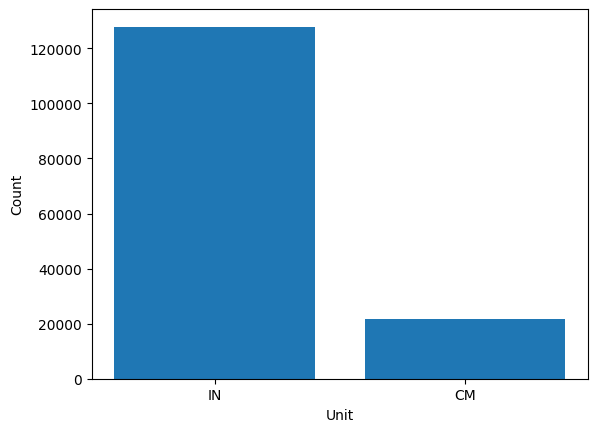

In [ ]:
#visualizing count of inches againts centimeters
x = [list(consignment_volume_data['unit']).count('IN'), list(consignment_volume_data['unit']).count('CM')]
plt.bar(['IN', 'CM'], x)
plt.xlabel('Unit')
plt.ylabel('Count')
plt.show()

In [ ]:
print("No. of unique Consignments: ", consignment_volume_data['consignment_id'].nunique())
print("Max number of boxes for a consignment ", consignment_volume_data['number_of_boxes'].idxmax())
print("Consignments with max number of boxes: ", consignment_volume_data['consignment_id'][consignment_volume_data['number_of_boxes'].idxmax()])

No. of unique Consignments:  86663
Max number of boxes for a consignment  5441
Consignments with max number of boxes:  35300


# Analysis of consignment_volume_data
---
1. Most measurements are done in INCH
2. 'created_at' column is useless as it contains no actual values
3. There are a total of 86663 unique consignments
4. Maximum number of boxes is for consignment: 35300
5. Maximum total no. of boxes is 5441

In [ ]:
#analysing consignment_volume_data

cols = ['Client ID', 'Industry Type', 'No of Boxes in INCH', 'No of Boxes in CM', 'INCH / CM Client']
output_2 = pd.DataFrame(columns=cols)
unique_id = consignment_data['client_id'].unique()
output_2['Client ID'] = unique_id
output_2.index = unique_id

output_2['No of Boxes in INCH'] = 0
output_2['No of Boxes in CM'] = 0

#creating dictonaries for faster computation
cinch = dict() #contains the unit in inch for every client
ccm = dict() #contains the unit in cm for every client
for i in consignment_data.index:
    cid = consignment_volume_data['consignment_id'][i]
    unit = consignment_volume_data['unit'][i]
    if unit=='IN':
        cinch[cid] = cinch.get(cid, 0) + (consignment_volume_data['number_of_boxes'][i])
    else:
        ccm[cid] = ccm.get(cid, 0) + (consignment_volume_data['number_of_boxes'][i])

#placing the values in the dataframe
visited = set()
for i in consignment_data.index:
    id = consignment_data['client_id'][i]
    cid = consignment_data['consignment_id'][i]
    output_2.loc[id, 'Industry Type'] = consignment_data['industry_type'][i]
    inch = cinch.get(cid, 0)
    cm = ccm.get(cid, 0)
    if(cid not in visited):
        output_2.loc[id, 'No of Boxes in INCH'] += inch
        output_2.loc[id, 'No of Boxes in CM'] += cm
    output_2.loc[id, 'INCH / CM Client'] = 'Inch Client' if output_2['No of Boxes in INCH'][id]>output_2['No of Boxes in CM'][id] else 'Cm Client'
    visited.add(cid)

In [ ]:
output_2.head()

,Client ID,Industry Type,No of Boxes in INCH,No of Boxes in CM,INCH / CM Client
1112,1112,APPAREL,1372,0,Inch Client
1113,1113,3PL,80,0,Inch Client
1114,1114,3PL,39,1157,Cm Client
1115,1115,CHEMICALS,1522,54,Inch Client
1116,1116,MEDIA & PUBLICATIONS,5584,1,Inch Client


In [ ]:
print("Max no. of boxes in inches is for client: ", output_2['Client ID'][output_2['No of Boxes in INCH'].idxmax()])
print("Max no. of boxes in inches is for industry: ", output_2['Industry Type'][output_2['No of Boxes in INCH'].idxmax()])
print("Max no. of boxes in cm is for client: ", output_2['Client ID'][output_2['No of Boxes in CM'].idxmax()])
print("Max no. of boxes in cm is for client: ", output_2['Industry Type'][output_2['No of Boxes in CM'].idxmax()])

Max no. of boxes in inches is for client:  1151
Max no. of boxes in inches is for industry:  ECOMMERCE
Max no. of boxes in cm is for client:  1235
Max no. of boxes in cm is for client:  INDUSTRIAL


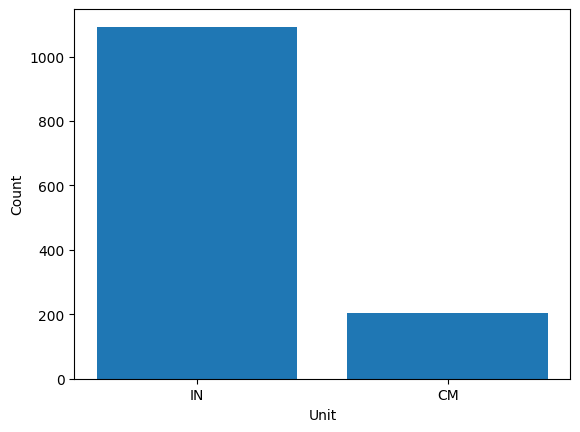

In [ ]:
#plotting number inch clients against number of cm clients
x = [list(output_2['INCH / CM Client']).count('Inch Client'), list(output_2['INCH / CM Client']).count('Cm Client')]
plt.bar(['IN', 'CM'], x)
plt.xlabel('Unit')
plt.ylabel('Count')
plt.show()

# Analysis of output_2
---
1. Maximum no. of boxes in inches is for client:  1151
2. Maximum no. of boxes in inches is for industry:  ECOMMERCE
3. Maximum no. of boxes in cm is for client:  1235
4. Maximum no. of boxes in cm is for client:  INDUSTRIAL
5. No. of client using dimension is inches is higher that no. of clients using dimensions in cm

In [ ]:
#formatting the values of length breadth and height such that max is length, min is height and median is breadth
for i in consignment_volume_data.index:
    length = consignment_volume_data['length'][i]
    breath = consignment_volume_data['breadth'][i]
    height = consignment_volume_data['height'][i]
    consignment_volume_data.loc[i, 'length'] = max(length, breath, height)
    consignment_volume_data.loc[i, 'breadth'] = length + breath + height - max(length, breath, height) - min(length, breath, height)
    consignment_volume_data.loc[i, 'height'] = min(length, breath, height)

In [ ]:
#changing all the units to one category
def change(unit):
    if(unit=='CM'):
        mul = 0.393701
        ch = 'IN'
    else:
        mul = 2.54
        ch = 'CM'

    for i in consignment_volume_data.index:
        if(consignment_volume_data['unit'][i]==unit):
            consignment_volume_data.loc[i, 'length'] *= mul
            consignment_volume_data.loc[i, 'breadth'] *= mul
            consignment_volume_data.loc[i, 'height'] *= mul
            consignment_volume_data.loc[i, 'unit'] = ch     #also changing the unit

inch_count = list(output_2['No of Boxes in INCH']).count(0)
cm_count = list(output_2['No of Boxes in CM']).count(0)

change('IN') if inch_count>cm_count else change('CM') #catefory with lesser number of count will be changed so converting can be a little fatser

consignment_volume_data.head(10)

,consignment_id,length,breadth,height,unit,number_of_boxes,created_at
0,32123,31.000000,15.000000,12.000000,IN,1,NaN
1,32124,22.000000,12.000000,8.000000,IN,2,NaN
2,32124,23.000000,13.000000,11.000000,IN,4,NaN
3,32124,20.000000,13.000000,11.000000,IN,8,NaN
4,32125,31.000000,15.000000,12.000000,IN,1,NaN
5,32126,51.968532,48.031522,4.724412,IN,1,NaN
6,32126,51.181130,10.629927,7.874020,IN,1,NaN
7,32126,14.960638,13.385834,13.385834,IN,1,NaN
8,32126,12.992133,8.661422,4.724412,IN,1,NaN
9,32127,15.000000,13.000000,13.000000,IN,50,NaN


In [ ]:
#analysing length in consignment_volume_data correspoding to its client id in consignment_data

cols=['Client ID', 'Max Length', 'Most Frequent Length', 'Frequency of Most Frequent Length', 'Frequency of Max Length', 'IQR - Lower Limit', 'IQR - Upper Limit']
output_3_length = pd.DataFrame(columns=cols)
unique_id = consignment_data['client_id'].unique()
output_3_length['Client ID'] = unique_id
output_3_length.index = unique_id

#creating dictionaries for faster computing
most = dict()           #contains all length for every consignment
for i in consignment_volume_data.index:
    cid = consignment_volume_data['consignment_id'][i]
    le = consignment_volume_data['length'][i]
    if cid in most:
        most[cid].append(le)
    else:
        most[cid] = [le]

length_dict = dict()    #contains all the length for every client
for i in consignment_data.index:
    client_id = consignment_data['client_id'][i]
    con_id = consignment_data['consignment_id'][i]
    if client_id in length_dict:
        length_dict[client_id] = length_dict[client_id] + most[con_id]
    else:
        length_dict[client_id] = most[con_id]

#forming the dataframe
visited = set()
for i in consignment_data.index:
    id = consignment_data['client_id'][i]
    if id not in visited:
        lk = length_dict[id]
        output_3_length.loc[id, 'Max Length'] = max(lk)
        output_3_length.loc[id, 'Frequency of Max Length'] = lk.count(max(lk))
        output_3_length.loc[id, 'Most Frequent Length'] = mode(lk)
        output_3_length.loc[id, 'Frequency of Most Frequent Length'] = lk.count(mode(lk))
        output_3_length.loc[id, 'IQR - Lower Limit'] = pd.Series(lk).quantile(0.25)
        output_3_length.loc[id, 'IQR - Upper Limit'] = pd.Series(lk).quantile(0.75)
        visited.add(cid)

In [ ]:
output_3_length.head()

,Client ID,Max Length,Most Frequent Length,Frequency of Most Frequent Length,Frequency of Max Length,IQR - Lower Limit,IQR - Upper Limit
1112,1112,154.0,31.0,814,1,24.0,31.0
1113,1113,58.0,24.0,19,1,20.0,24.0
1114,1114,1235.0,130.0,439,1,35.0,130.0
1115,1115,41.0,16.0,33,1,15.0,18.0
1116,1116,118.0,18.0,677,1,18.0,18.0


In [ ]:
#analysing weight in consignment_volume_data correspoding to its client id in consignment_data

cols=['Client ID', 'Max Weight', 'Most Frequent Weight', 'Frequency of Most Frequent Weight', 'Frequency of Max Weight', 'IQR - Lower Limit', 'IQR - Upper Limit']
output_3_weight = pd.DataFrame(columns=cols)
unique_id = consignment_data['client_id'].unique()
output_3_weight['Client ID'] = unique_id
output_3_weight.index = unique_id

#creating dictionaries for faster computing
weight = dict() #contains all the lengths and its count for every client
for i in consignment_data.index:
    cid = consignment_data['client_id'][i]
    we = consignment_data['weight'][i]
    if cid in weight:
        weight[cid].append(we)
    else:
        weight[cid] = [we]

#forming the dataframe
for i in consignment_data.index:
    cid = consignment_data['client_id'][i]
    lk = weight[cid]
    output_3_weight.loc[cid, 'Max Weight'] = max(lk)
    output_3_weight.loc[cid, 'Frequency of Max Weight'] = lk.count(max(lk))
    output_3_weight.loc[cid, 'Most Frequent Weight'] = mode(lk)
    output_3_weight.loc[cid, 'Frequency of Most Frequent Weight'] = lk.count(mode(lk))
    output_3_weight.loc[cid, 'IQR - Lower Limit'] = pd.Series(lk).quantile(0.25)
    output_3_weight.loc[cid, 'IQR - Upper Limit'] = pd.Series(lk).quantile(0.75)

In [ ]:
output_3_weight.head()

,Client ID,Max Weight,Most Frequent Weight,Frequency of Most Frequent Weight,Frequency of Max Weight,IQR - Lower Limit,IQR - Upper Limit
1112,1112,920.0,12.0,121,1,12.0,37.0
1113,1113,432.0,20.0,6,1,22.5,96.0
1114,1114,512.0,68.0,245,1,61.0,68.0
1115,1115,4240.0,318.0,4,3,64.5,515.5
1116,1116,4530.0,7.0,19,1,17.0,161.0


# **D3: Consignment Logic Building**
---

In [ ]:
#building multiple logics to identify outliers and incorrect entries

consignment_logic_building = pd.merge(consignment_data, consignment_volume_data, on='consignment_id', how='left')

lk_density = consignment_logic_building['CFT']
q1_density = lk_density.quantile(0.25)
q3_density = lk_density.quantile(0.75)
iqr_density = q3_density - q1_density
cft_iqr_lower = q1_density - 1.5*iqr_density
cft_iqr_upper = q3_density + 1.5*iqr_density

lk_length = consignment_logic_building['length']
q1_length = lk_length.quantile(0.25)
q3_length = lk_length.quantile(0.75)
iqr_length = q3_length - q1_length
length_iqr_lower = q1_length - 1.5*iqr_length
length_iqr_upper = q3_length + 1.5*iqr_length

industry_dict = dict()
for i in consignment_logic_building.index:
    ind = consignment_logic_building['industry_type'][i]
    we = consignment_logic_building['weight'][i]
    if ind in industry_dict:
        industry_dict[ind].append(we)
    else:
        industry_dict[ind] = [we]

unique_industry = consignment_logic_building['industry_type'].unique()

industry = dict()
for i in unique_industry:
    q1 = pd.Series(industry_dict[i]).quantile(0.25)
    q3 = pd.Series(industry_dict[i]).quantile(0.75)
    iqr = q3 - q1
    industry[i] = [q1 - 1.5*iqr, q3 + 1.5*iqr]

inch_set = set()
cm_set = set()

consignment_logic_building['Logic_1_Outlier'] = False       #identifying outlier using iqr values of density
consignment_logic_building['Logic_2_Outlier'] = False       #identifying outlier using iqr values of length
consignment_logic_building['Logic_3_Outlier'] = False       #identifying outlier using iqr values for corresponding industry type
consignment_logic_building['Logic_4_Outlier'] = False       #identifying outlier considering that a measurement can only exist in only one kind of unit
consignment_logic_building['Logic_5_Outlier'] = False       #identifying outlier if all the measurements are equal to 1

#forming the dataframe
for i in consignment_logic_building.index:
    ind = consignment_logic_building['industry_type'][i]
    consignment_logic_building.loc[i, 'Logic_1_Outlier'] = False if consignment_logic_building['CFT'][i]>cft_iqr_lower and consignment_logic_building['CFT'][i]<cft_iqr_upper else True
    consignment_logic_building.loc[i, 'Logic_2_Outlier'] = False if consignment_logic_building['length'][i]>length_iqr_lower and consignment_logic_building['length'][i]<length_iqr_upper else True
    consignment_logic_building.loc[i, 'Logic_3_Outlier'] = False if consignment_logic_building['weight'][i]>industry[ind][0] and consignment_logic_building['weight'][i]<industry[ind][1] else True
    consignment_logic_building.loc[i, 'Logic_5_Outlier'] = True if consignment_logic_building['length'][i]==1 and consignment_logic_building['breadth'][i]==1 and consignment_logic_building['height'][i]==1 else False

    unit = consignment_logic_building['unit'][i]
    asd = str(consignment_logic_building['length'][i]) + 'x' + str(consignment_logic_building['breadth'][i]) + 'x' + str(consignment_logic_building['height'][i])
    if unit=='IN' and asd not in cm_set:
        inch_set.add(asd)
    elif unit=='CM' and asd not in inch_set:
        cm_set.add(asd)
    else:
        consignment_logic_building['Logic_4_Outlier'][i] = True

<ipython-input-34-8f59ed123216>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consignment_logic_building['Logic_4_Outlier'][i] = True


In [ ]:
consignment_logic_building.head()

,consignment_id,client_id,weight,volume,total_boxes,industry_type,CFT,length,breadth,height,unit,number_of_boxes,Logic_1_Outlier,Logic_2_Outlier,Logic_3_Outlier,Logic_4_Outlier,Logic_5_Outlier
0,32123,1112,13.0,3.23,1,APPAREL,4.024768,31.0,15.0,12.0,IN,1,False,False,False,False,False
1,32124,1113,122.0,23.30,14,3PL,5.236052,22.0,12.0,8.0,IN,2,False,False,False,False,False
2,32124,1113,122.0,23.30,14,3PL,5.236052,23.0,13.0,11.0,IN,4,False,False,False,False,False
3,32124,1113,122.0,23.30,14,3PL,5.236052,20.0,13.0,11.0,IN,8,False,False,False,False,False
4,32125,1112,19.0,3.23,1,APPAREL,5.882353,31.0,15.0,12.0,IN,1,False,False,False,False,False


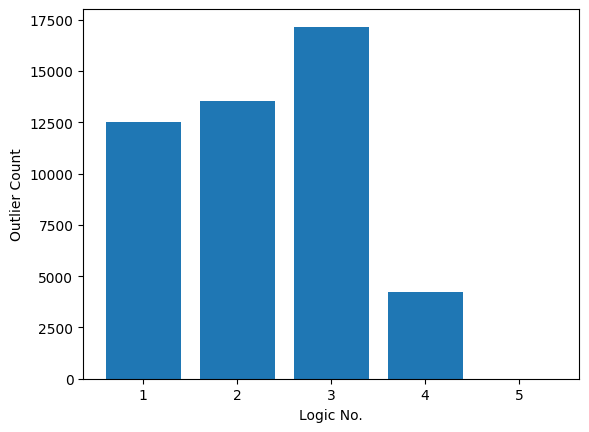

In [ ]:
#plotting outliers using every logic

logic1_count = list(consignment_logic_building['Logic_1_Outlier']).count(True)
logic2_count = list(consignment_logic_building['Logic_2_Outlier']).count(True)
logic3_count = list(consignment_logic_building['Logic_3_Outlier']).count(True)
logic4_count = list(consignment_logic_building['Logic_4_Outlier']).count(True)
logic5_count = list(consignment_logic_building['Logic_5_Outlier']).count(True)

outliers = [logic1_count, logic2_count, logic3_count, logic4_count, logic5_count]
logic = [1, 2, 3, 4, 5]
plt.bar(logic, outliers)
plt.xlabel('Logic No.')
plt.ylabel('Outlier Count')
plt.show()

# **D4: Logic Performance**
---

In [ ]:
cols=[  ('','Client ID'),
        ('','Industry Type'),
        ('', 'No. of Consignments'),
        ('No. of Error Detected', 'Logic: 1'), ('No. of Error Detected', 'Logic: 2'), ('No. of Error Detected', 'Logic: 3'), ('No. of Error Detected', 'Logic: 4'), ('No. of Error Detected', 'Logic: 5'),
        ('Model Performance %', 'Logic: 1'), ('Model Performance %', 'Logic: 2'), ('Model Performance %', 'Logic: 3'), ('Model Performance %', 'Logic: 4'), ('Model Performance %', 'Logic: 5') ]

final_df = pd.DataFrame(columns=pd.MultiIndex.from_tuples(cols))

unique_id = consignment_logic_building['client_id'].unique()
final_df.loc[:,('', 'Client ID')] = unique_id
final_df.index = unique_id

final_df.loc[:, ('', 'No. of Consignments')] = 0
final_df.loc[:, ('No. of Error Detected')] = 0
final_df.loc[:, ('Model Performance %')] = 0

for i in consignment_logic_building.index:
    cid = consignment_logic_building['client_id'][i]
    ind = consignment_logic_building['industry_type'][i]
    final_df.loc[cid, ('', 'Industry Type')] = ind
    final_df.loc[cid, ('', 'No. of Consignments')] += consignment_logic_building['total_boxes'][i]
    final_df.loc[cid, ('No. of Error Detected', 'Logic: 1')] += 1 if consignment_logic_building['Logic_1_Outlier'][i] else 0
    final_df.loc[cid, ('No. of Error Detected', 'Logic: 2')] += 1 if consignment_logic_building['Logic_2_Outlier'][i] else 0
    final_df.loc[cid, ('No. of Error Detected', 'Logic: 3')] += 1 if consignment_logic_building['Logic_3_Outlier'][i] else 0
    final_df.loc[cid, ('No. of Error Detected', 'Logic: 4')] += 1 if consignment_logic_building['Logic_4_Outlier'][i] else 0
    final_df.loc[cid, ('No. of Error Detected', 'Logic: 5')] += 1 if consignment_logic_building['Logic_5_Outlier'][i] else 0

for i in final_df.index:
    final_df.loc[i, ('Model Performance %', 'Logic: 1')] += final_df.loc[i, ('No. of Error Detected', 'Logic: 1')]/final_df.loc[i, ('', 'No. of Consignments')]*100
    final_df.loc[i, ('Model Performance %', 'Logic: 2')] += final_df.loc[i, ('No. of Error Detected', 'Logic: 2')]/final_df.loc[i, ('', 'No. of Consignments')]*100
    final_df.loc[i, ('Model Performance %', 'Logic: 3')] += final_df.loc[i, ('No. of Error Detected', 'Logic: 3')]/final_df.loc[i, ('', 'No. of Consignments')]*100
    final_df.loc[i, ('Model Performance %', 'Logic: 4')] += final_df.loc[i, ('No. of Error Detected', 'Logic: 4')]/final_df.loc[i, ('', 'No. of Consignments')]*100
    final_df.loc[i, ('Model Performance %', 'Logic: 5')] += final_df.loc[i, ('No. of Error Detected', 'Logic: 5')]/final_df.loc[i, ('', 'No. of Consignments')]*100

<ipython-input-38-60f38076e308>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  final_df.loc[:, ('', 'No. of Consignments')] = 0
<ipython-input-38-60f38076e308>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  final_df.loc[:, ('No. of Error Detected')] = 0
<ipython-input-38-60f38076e308>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.i

# **END**
---

In [ ]:
iqr_analysis.to_csv('IQR_Analysis.csv', index=False)

In [ ]:
output_2.to_csv('Consignment_Volume_Analysis.csv', index=False)

In [ ]:
output_3_length.to_csv('Consignment_Volume_Analysis_of_Length.csv', index=False)

In [ ]:
output_3_weight.to_csv('Consignment_Volume_Analysis_of_Weight.csv', index=False)

In [ ]:
consignment_logic_building.to_csv('Consignment_Logic_Building.csv', index=False)

In [ ]:
final_df.to_csv('Logic Performance.csv', index=False, sep=',')

In [ ]:
consignment_data.to_csv('my_consignment_data.csv', index=False)

In [ ]:
consignment_volume_data.to_csv('my_consignment_volume_data.csv', index=False)